In [3]:
from sparrow.protein import Protein
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tqdm import tqdm

In [4]:
# Read in the top most active sequences
f1 = open("AllSeqs_Activity_at_WxxLF_-50_+20_all138.fasta")
seq_dict = {}
header = ""
body = ""
for line in f1:
    if line.startswith('>'):
        if header != "": 
            seq_dict[header] = body
            body = ""
        header = line.strip()
    else: 
        body += line.strip()

data = pd.DataFrame.from_dict(seq_dict, orient='index')
data.columns = ["Sequence"]

seqs = data["Sequence"].values

In [5]:
# Use sparrow to predict helicity
predictions = []

means = []
maxs = []
helix = []

for i in tqdm(range(len(seqs))):
    P = Protein(seqs[i])
    # Predict helicity, returns tuple of 1/0 (yes/no helix) and probability of helix for each residue
    preds = P.predictor.dssp_helicity(mode="both")

    # Save probabilities
    predictions.append(preds[1])

    # Save yes/no helix
    helix.append(preds[0])

    # Get max helical probability across all residues
    maxs.append(preds[1].max())

    # Get mean helical probability across all residues
    means.append(preds[1].mean())
    

 15%|█▌        | 21/137 [00:00<00:02, 44.83it/s]

Error importing GPy.
 If trying to run parrot-optimize, make sure to use `pip install idptools-parrot[optimize]`


100%|██████████| 137/137 [00:01<00:00, 114.22it/s]


In [6]:
data["helix"] = helix
data["mean_helix_prob"] = means
data["max_helix_prob"] = maxs

Text(0, 0.5, 'Number of sequence')

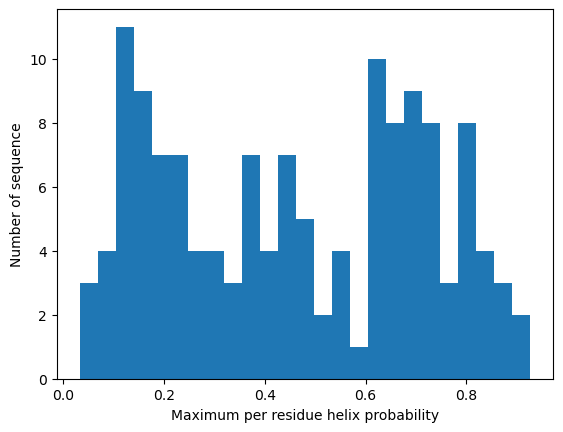

In [7]:
# Plot maximum probability
plt.hist(data["max_helix_prob"], bins=25)
plt.xlabel("Maximum per residue helix probability")
plt.ylabel("Number of sequence")

In [8]:
# Defines a helix as 5 or more residues with over a 50% change of being helical
def has_helix(ls):
    max = 0
    curr_count = 0
    for el in ls: 
        if el == 1:
            curr_count += 1
        else:
            if curr_count > max:
                max = curr_count
            curr_count =0
    if max >= 5:
        return 1
    else:
        return 0

In [9]:
has_helix_list = []

for ls in helix:
    has_helix_list.append(has_helix(ls))

In [10]:
# Number of sequences predicted to have a helix
sum(has_helix_list)

38